#                               Case Study: Mall Customers Segmentation

<img src="Mall-Customers-Pic.png" width = '800' height = '400' />

### Introduction

Companies employing customer segmentation operate under the fact that every customer is different and that their marketing efforts would be better served if they target specific, smaller groups with messages that those consumers would find relevant and lead them to buy something. Companies also hope to gain a deeper understanding of their customers' preferences and needs with the idea of discovering what each segment finds most valuable to more accurately tailor marketing materials toward that segment.

Malls or shopping complexes are often indulged in the race to increase their customers and hence making huge profits. To achieve this task machine learning is being applied by many stores already. It is amazing to realize the fact that how machine learning can aid in such ambitions. The shopping complexes make use of their customers’ data and develop ML models to target the right ones. This not only increases sales but also makes the complexes efficient.

### Problem:

Discuss a specific problem based on clustering techniques. 

Malls or shopping complexes are often indulged in the race to increase their customers and hence making huge profits. To achieve this task machine learning is being applied by many stores already.


### Dataset:

Here we have the following features :

    CustomerID: It is the unique ID given to a customer
    Gender: Gender of the customer
    Age: The age of the customer
    Annual Income(k$): It is the annual income of the customer
    Spending Score: It is the score(out of 100) given to a customer by the mall authorities, based on the money spent and the behavior of the customer.


In [10]:
# Importing the Required Libraries 

import numpy as np 
import pandas as pd 
from pandas import plotting
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('fivethirtyeight')

In [3]:
# importing the dataset
dataset = pd.read_csv('Mall-Customers-Data.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
print('This dataset contains ',dataset.shape[0],'rows')
print('This dataset contains ',dataset.shape[1],'columns')

This dataset contains  200 rows
This dataset contains  5 columns


In [8]:
print("Mean of Annual Income (k$) of Female:",dataset['Annual Income (k$)'].loc[dataset['Gender'] == 'Female'].mean())
print("Mean of Annual Income (k$) of Male:",dataset['Annual Income (k$)'].loc[dataset['Gender'] == 'Male'].mean())

Mean of Annual Income (k$) of Female: 59.25
Mean of Annual Income (k$) of Male: 62.22727272727273


### Checking for Missing Values 

In [29]:
dataset.isnull().sum(axis=0).reset_index()

,index,0
0,CustomerID,0
1,Gender,0
2,Age,0
3,Annual Income (k$),0
4,Spending Score (1-100),0


## Visualizing Analytics

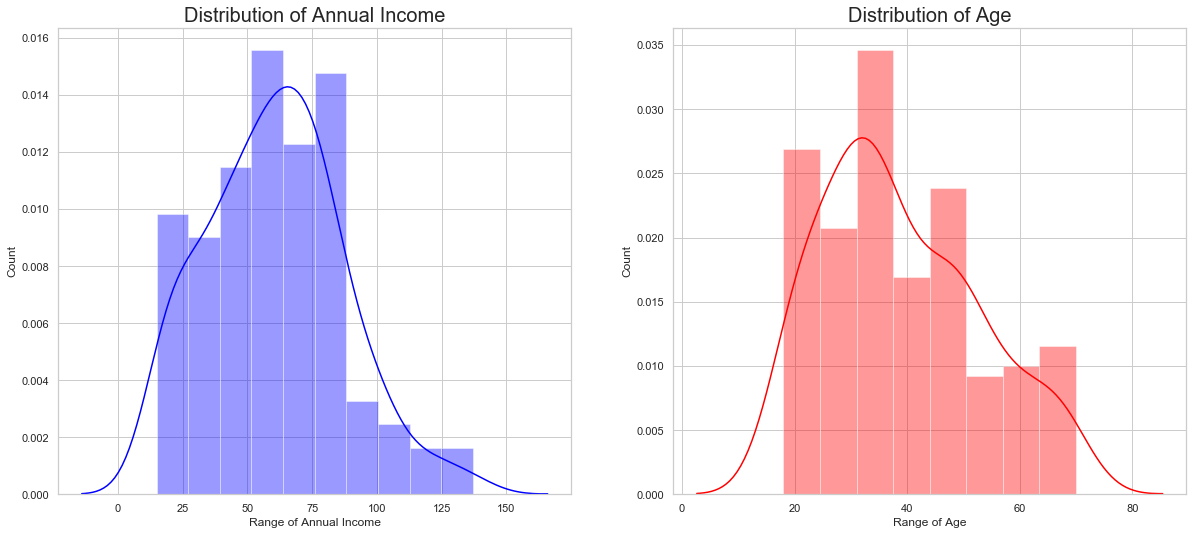

In [46]:
plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(dataset['Annual Income (k$)'], color = 'blue')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(dataset['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

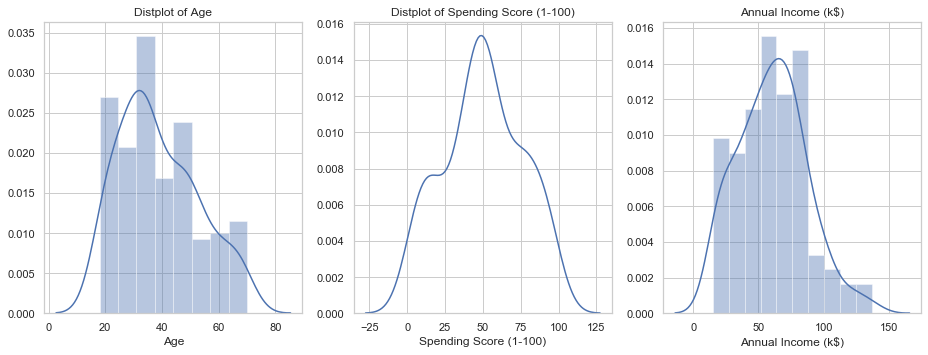

In [43]:
plt.figure(figsize=(14,5))
sns.set(style = 'whitegrid')
plt.subplot(1,3,1)
sns.distplot(dataset['Age'])
plt.title('Distplot of Age')
plt.subplot(1,3,2)
sns.distplot(dataset['Spending Score (1-100)'],hist=False)
plt.title('Distplot of Spending Score (1-100)')
plt.subplot(1,3,3)
sns.distplot(dataset['Annual Income (k$)'])
plt.title('Annual Income (k$)')
plt.show()

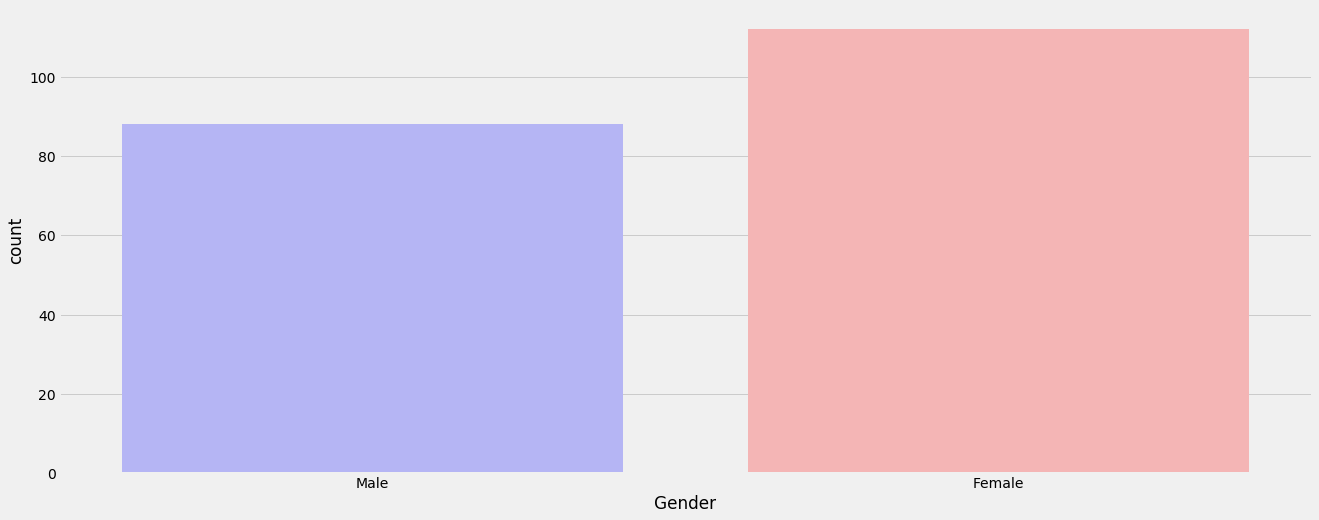

In [30]:
sns.countplot(x="Gender", data=dataset, palette="bwr")
plt.show()

In [31]:
dataset['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [32]:
dataset.groupby('Gender').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
Female,97.562500,38.098214,59.250000,51.526786
Male,104.238636,39.806818,62.227273,48.511364


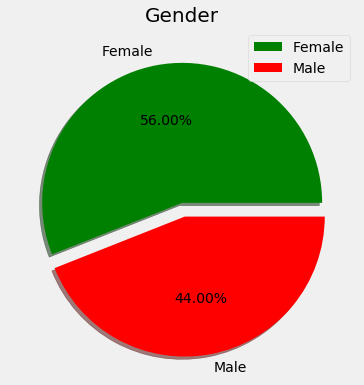

In [33]:
labels = ['Female', 'Male']
size = dataset['Gender'].value_counts()
colors = ['green', 'red']

plt.rcParams['figure.figsize'] = (6, 6)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True,autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

The Females are in the lead with a share of 56% whereas the Males have a share of 44%

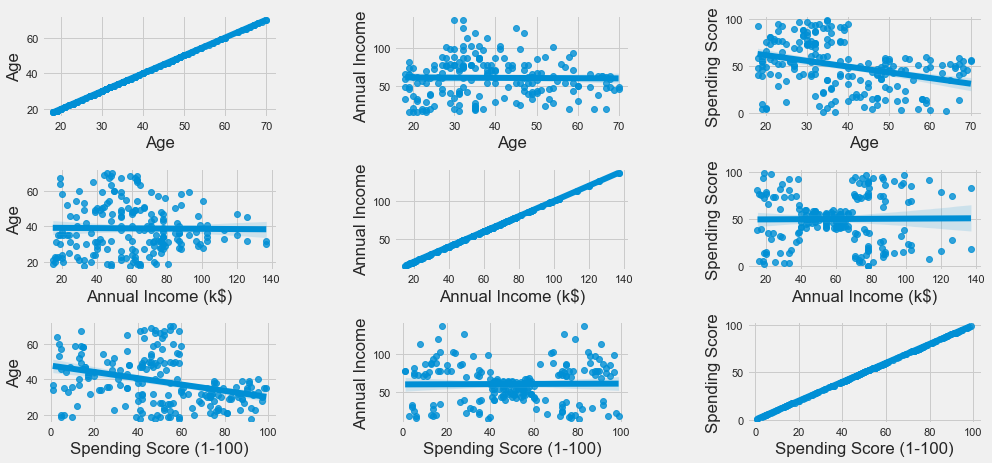

In [74]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = dataset)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

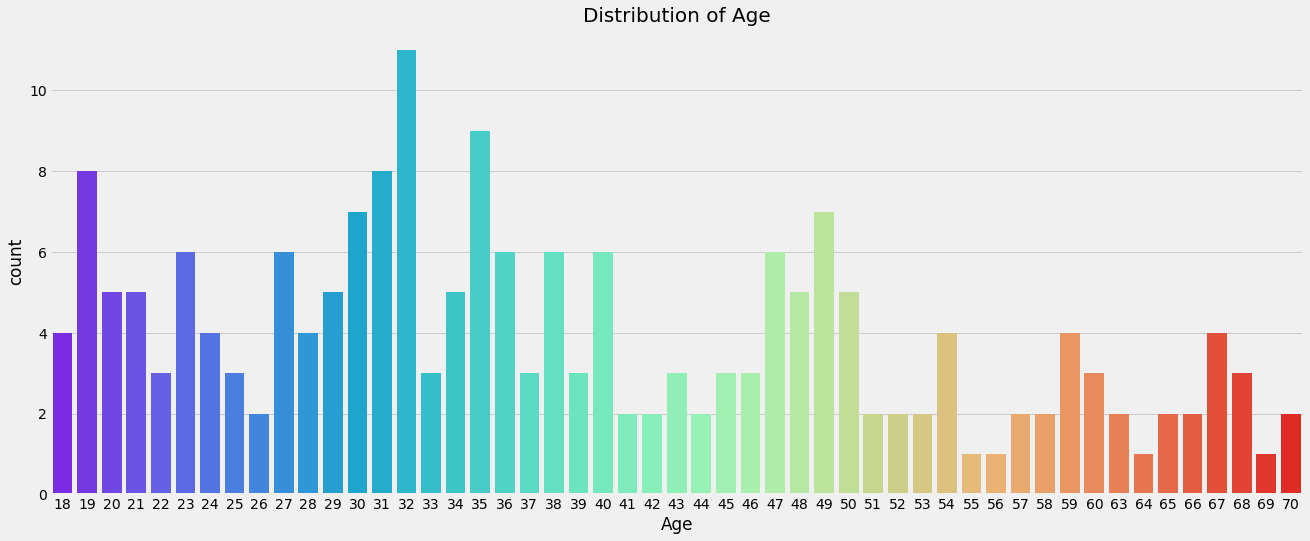

In [37]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(dataset['Age'], palette = 'rainbow')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

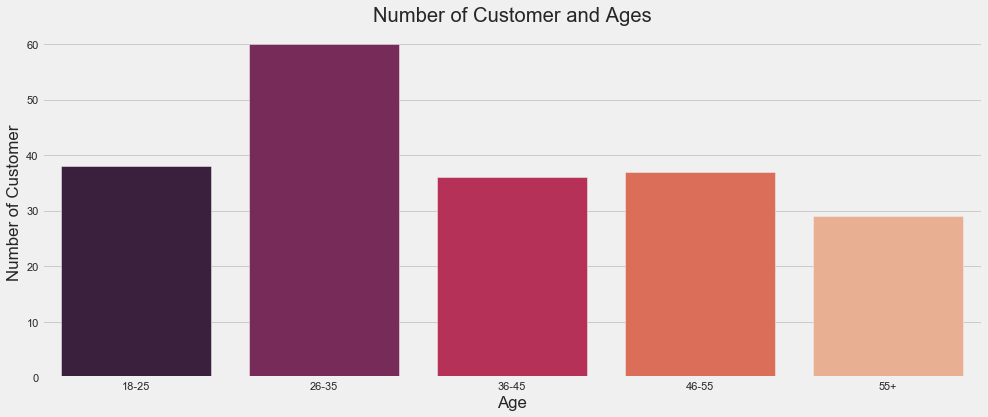

In [69]:
plt.style.use('fivethirtyeight')

age18_25 = dataset.Age[(dataset.Age <= 25) & (dataset.Age >= 18)]
age26_35 = dataset.Age[(dataset.Age <= 35) & (dataset.Age >= 26)]
age36_45 = dataset.Age[(dataset.Age <= 45) & (dataset.Age >= 36)]
age46_55 = dataset.Age[(dataset.Age <= 55) & (dataset.Age >= 46)]
age46_55 = dataset.Age[(dataset.Age <= 55) & (dataset.Age >= 46)]
age55above = dataset.Age[dataset.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

It can be seen that the Ages from 27 to 39 are very much frequent. 
There are equal no. of Visitors in the Mall for the Agee 18 and 67. 
People of Age 55, 56, 69, 64 are very less frequent in the Malls. 
People at Age 32 are the Most Frequent Visitors in the Mall.

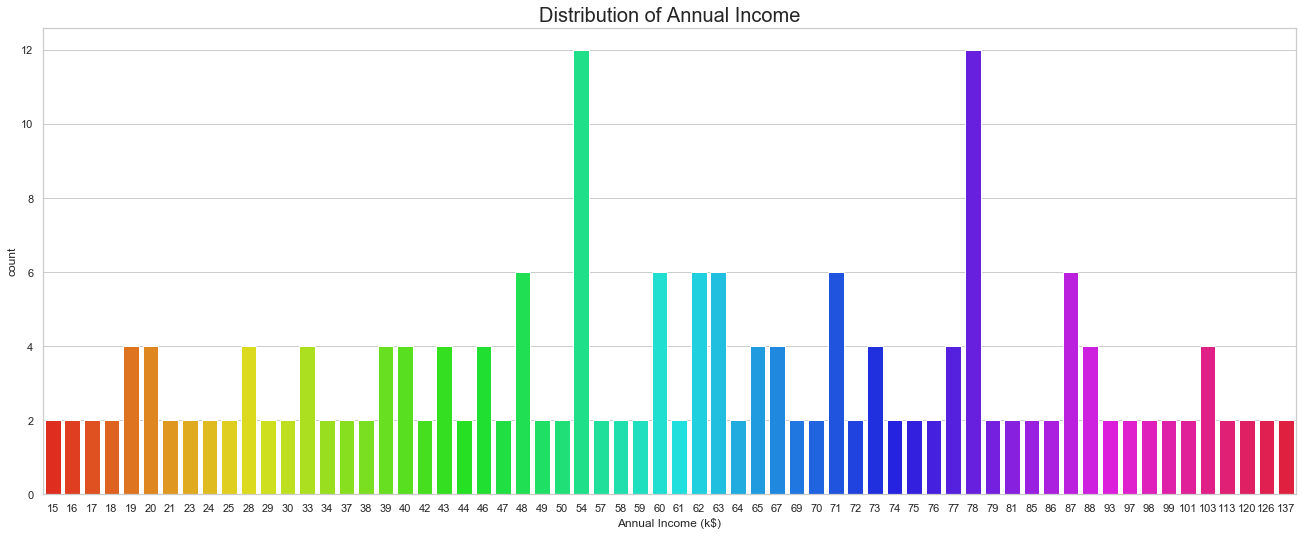

In [47]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(dataset['Annual Income (k$)'], palette = 'hsv')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

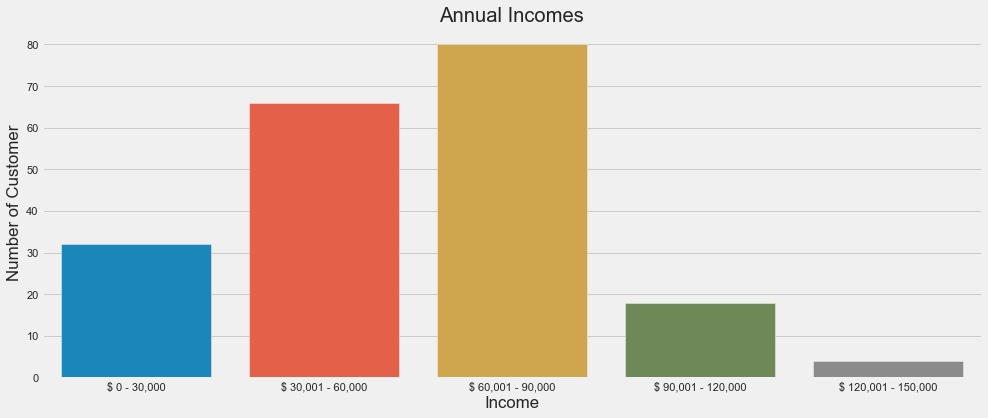

In [70]:
ai0_30 = dataset["Annual Income (k$)"][(dataset["Annual Income (k$)"] >= 0) & (dataset["Annual Income (k$)"] <= 30)]
ai31_60 = dataset["Annual Income (k$)"][(dataset["Annual Income (k$)"] >= 31) & (dataset["Annual Income (k$)"] <= 60)]
ai61_90 = dataset["Annual Income (k$)"][(dataset["Annual Income (k$)"] >= 61) & (dataset["Annual Income (k$)"] <= 90)]
ai91_120 = dataset["Annual Income (k$)"][(dataset["Annual Income (k$)"] >= 91) & (dataset["Annual Income (k$)"] <= 120)]
ai121_150 = dataset["Annual Income (k$)"][(dataset["Annual Income (k$)"] >= 121) & (dataset["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, )
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

There are customers in the mall with a very much comparable freqyuency with their Annual Income ranging from 15 US Dollars to 137K US Dollars. There are more Customers in the Mall whoc have their Annual Income as 54k US Dollars or 78 US Dollars.

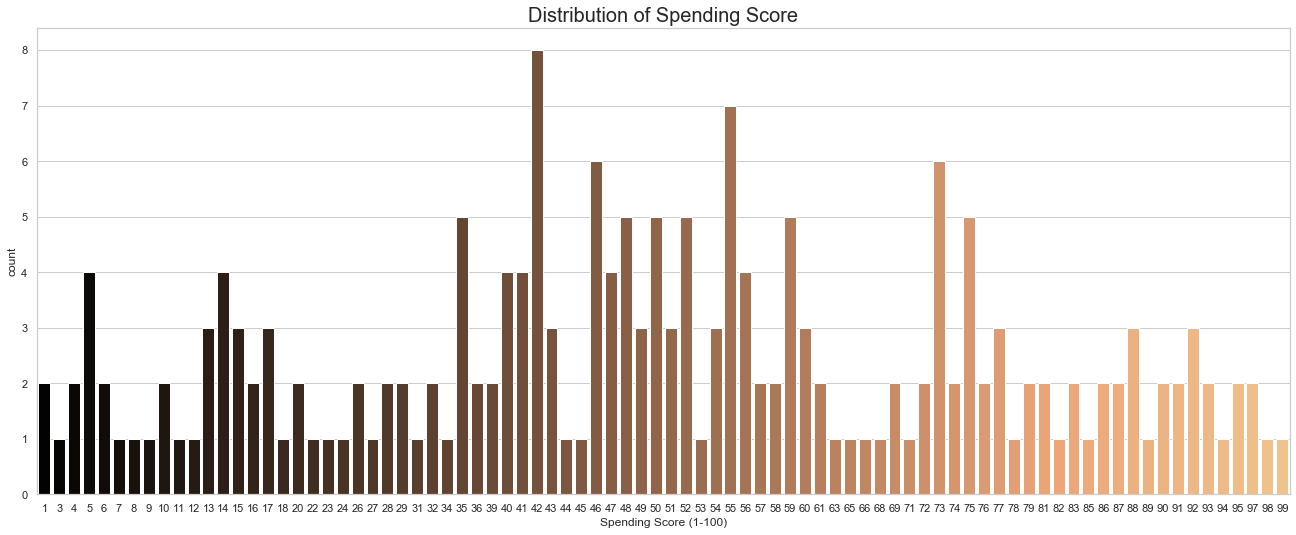

In [48]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(dataset['Spending Score (1-100)'], palette = 'copper')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

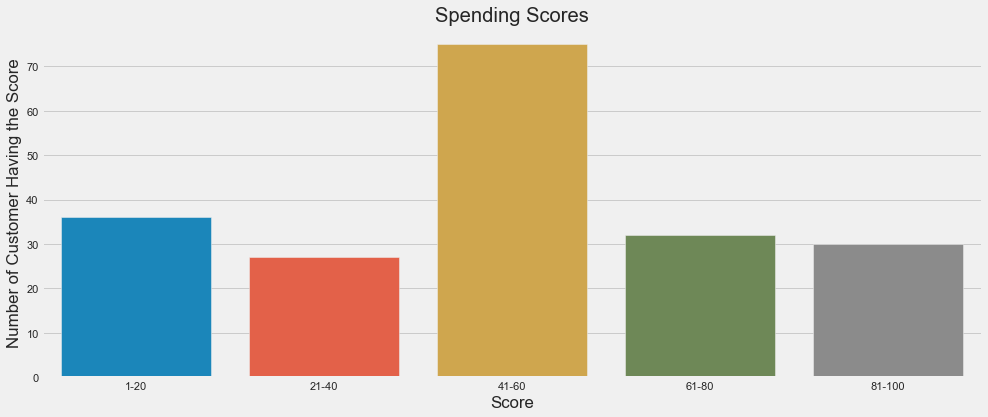

In [73]:
ss1_20 = dataset["Spending Score (1-100)"][(dataset["Spending Score (1-100)"] >= 1) & (dataset["Spending Score (1-100)"] <= 20)]
ss21_40 = dataset["Spending Score (1-100)"][(dataset["Spending Score (1-100)"] >= 21) & (dataset["Spending Score (1-100)"] <= 40)]
ss41_60 = dataset["Spending Score (1-100)"][(dataset["Spending Score (1-100)"] >= 41) & (dataset["Spending Score (1-100)"] <= 60)]
ss61_80 = dataset["Spending Score (1-100)"][(dataset["Spending Score (1-100)"] >= 61) & (dataset["Spending Score (1-100)"] <= 80)]
ss81_100 = dataset["Spending Score (1-100)"][(dataset["Spending Score (1-100)"] >= 81) & (dataset["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy)
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

We may conclude that most of the Customers have their Spending Score in the range of 35-60. People are having 99 Spending score also, Which shows that the mall caters to the variety of Customers with Varying needs and requirements available in the Mall.

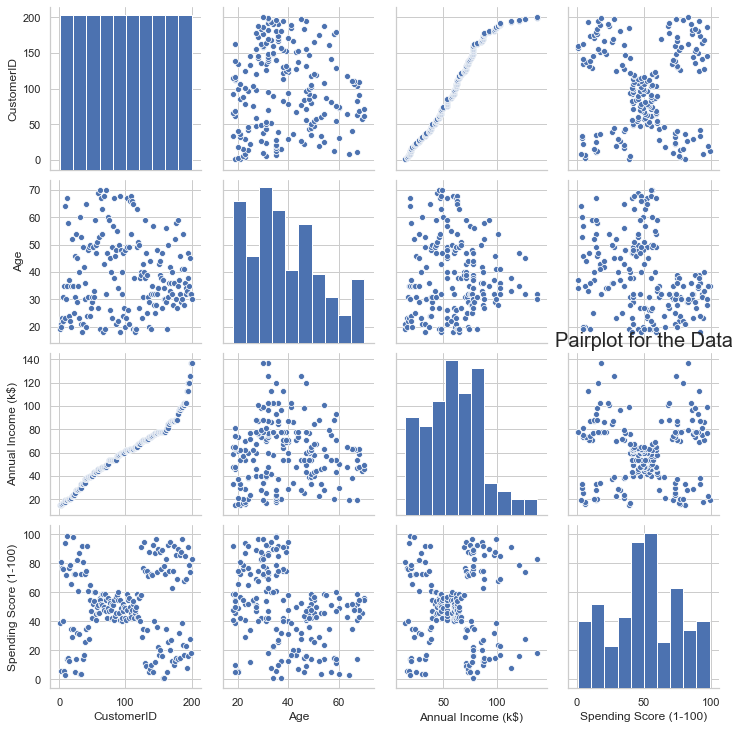

In [49]:
sns.pairplot(dataset)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

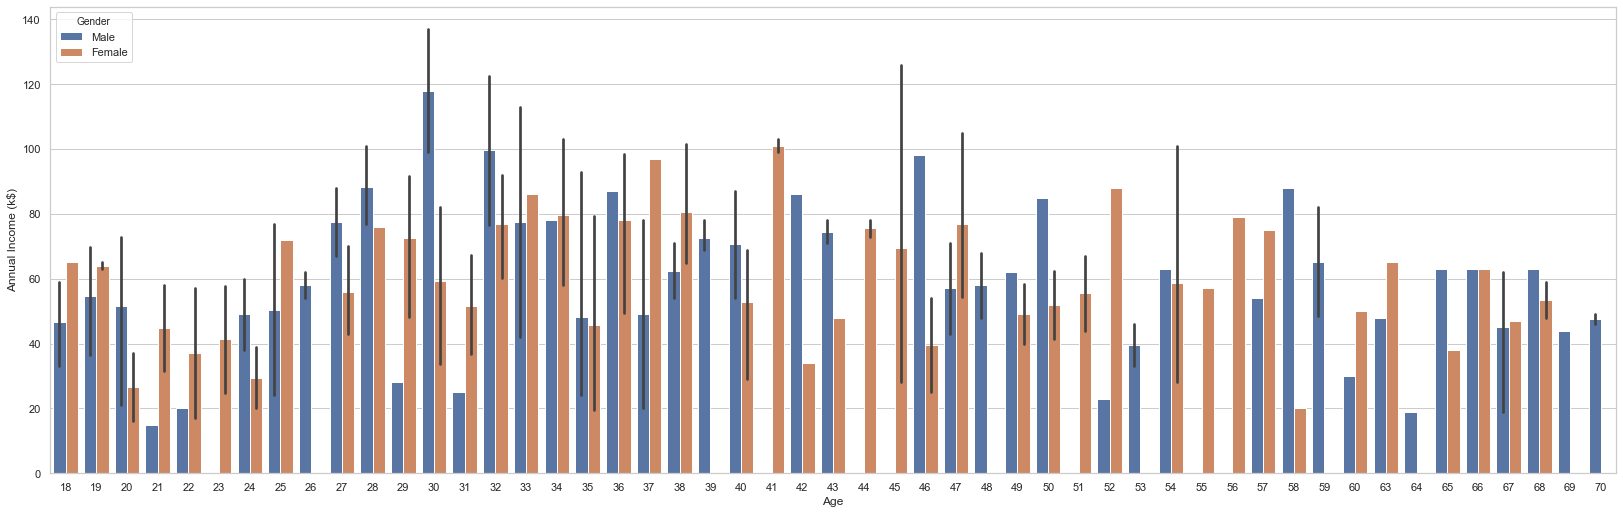

In [50]:
plt.figure(figsize=(25,8))
sns.barplot(y='Annual Income (k$)', x='Age',hue='Gender', data=dataset)
plt.show()

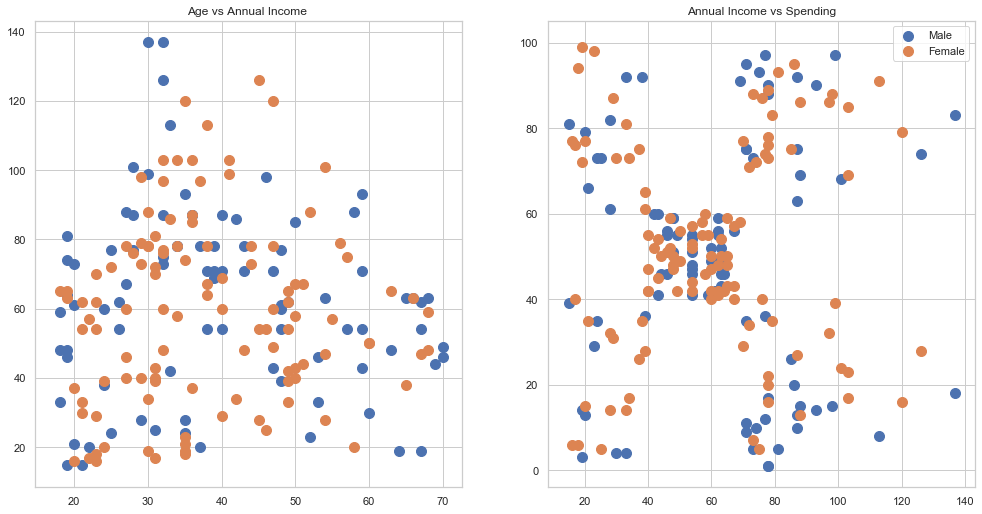

In [53]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = dataset[dataset['Gender'] == gender] ,label = gender,s=100)
    plt.title('Age vs Annual Income ')
plt.subplot(1,2,2)
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,data = dataset[dataset['Gender'] == gender] ,s = 100 , label = gender)
    plt.title('Annual Income vs Spending')
plt.legend()
plt.show()

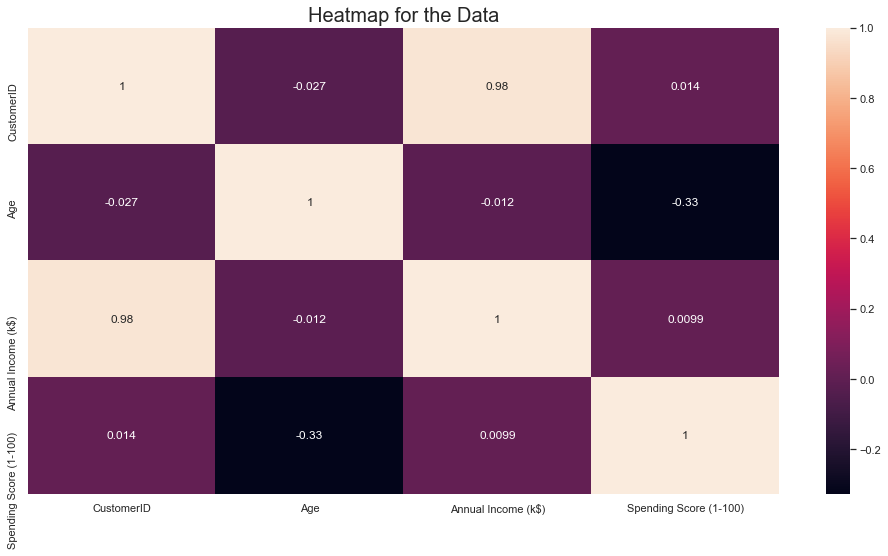

In [56]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(dataset.corr(), annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()


The Above Graph for Showing the correlation between the different attributes of the Mall Customer Segementation Dataset

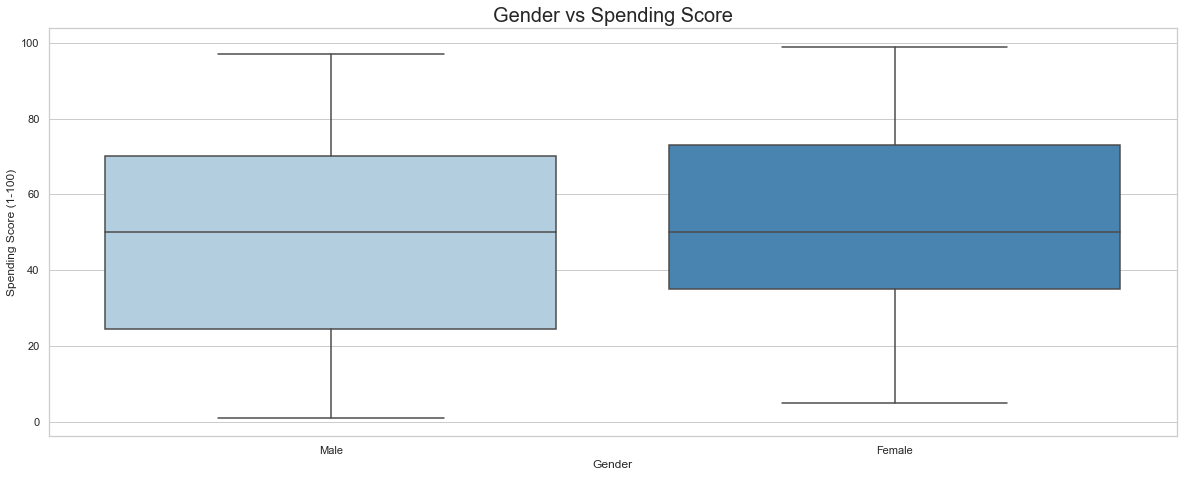

In [57]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.boxplot(dataset['Gender'], dataset['Spending Score (1-100)'], palette = 'Blues')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

It is clearly visible that the most of the males have a Spending Score of around 25k US Dollars to 70k US Dollars whereas the Females have a spending score of around 35k US Dollars to 75k US Dollars. 

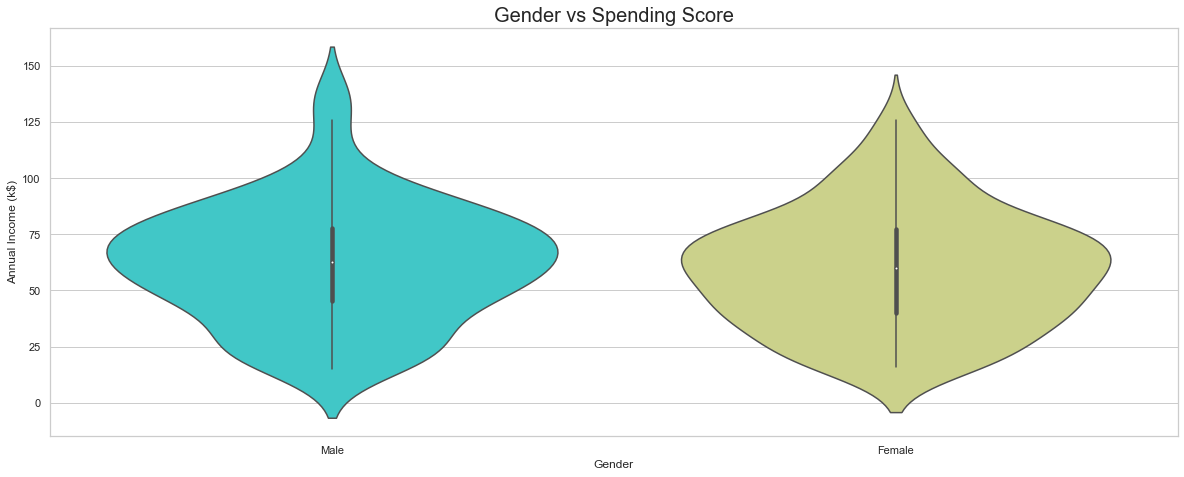

In [58]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(dataset['Gender'], dataset['Annual Income (k$)'], palette = 'rainbow')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

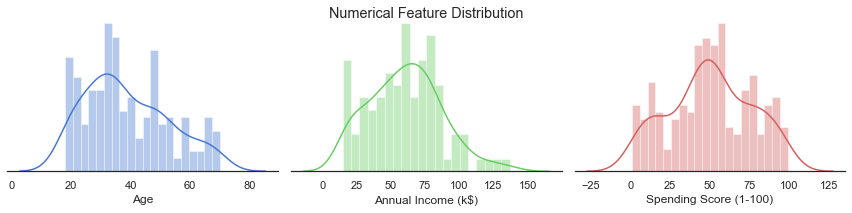

In [63]:
# Numerical features distribution
sns.set(style='white', palette='muted', color_codes=True)
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.despine(left=True)
axs[0] = sns.distplot(dataset['Age'], bins=20, ax=axs[0])
axs[1] = sns.distplot(dataset['Annual Income (k$)'], bins=20, ax=axs[1], color='g')
axs[2] = sns.distplot(dataset['Spending Score (1-100)'], bins=20, ax=axs[2], color='r')

fig.suptitle('Numerical Feature Distribution')
plt.setp(axs, yticks=[])
plt.tight_layout()
plt.show()

In [62]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


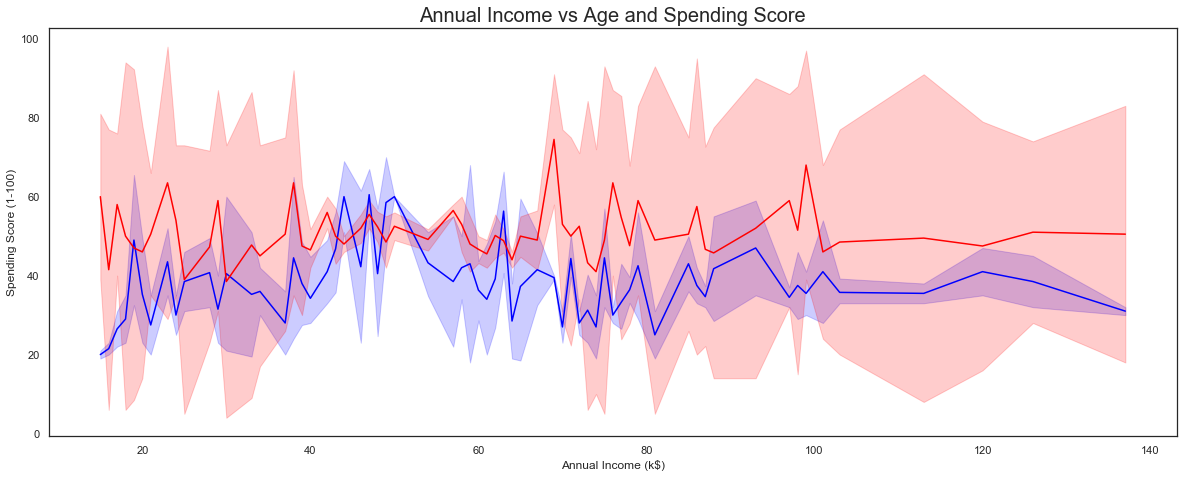

In [65]:
x = dataset['Annual Income (k$)']
y = dataset['Age']
z = dataset['Spending Score (1-100)']

sns.lineplot(x, y, color = 'blue')
sns.lineplot(x, z, color = 'red')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()

## Basic Approach

### Elbow Method Application

In [75]:
# Annual income and spending score columns
X = dataset.iloc[:, [3, 4]].values

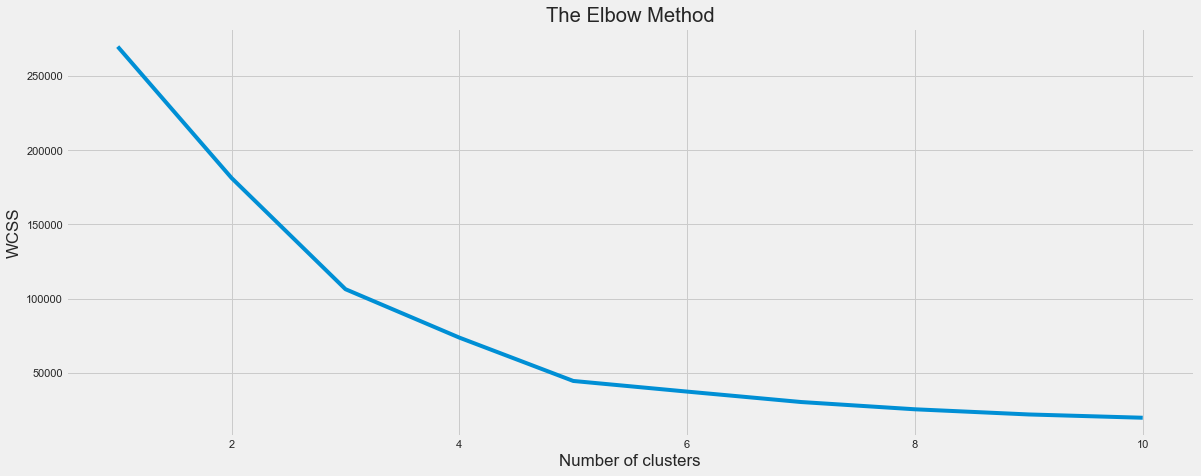

In [76]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Model Creation (K-Means)

In [78]:
# Fitting K-Means with K-means++ to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

### Data Visualization of Clusters

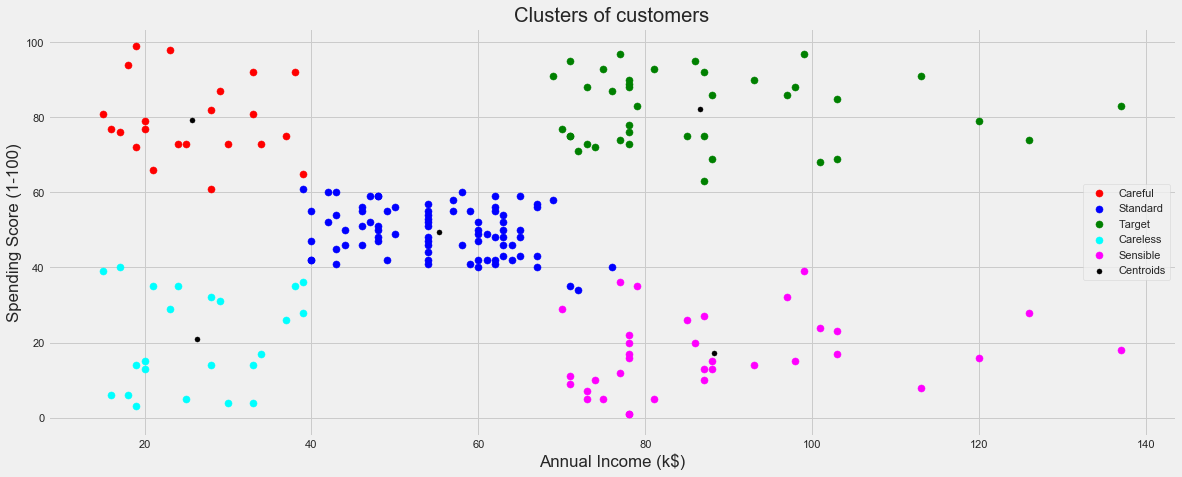

In [80]:
# Visualising the clusters
# The data(clusters) are plotted on a spending score Vs annual income curve.
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Careful')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Standard')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Careless')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 25, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()



The mall customers can be broadly grouped into five groups based on their purchases made in the mall.

The **Careful Customer Cluster (Cyan colored)** we can see people have low annual income and low spending scores, this is quite reasonable as people having low salaries prefer to buy less, in fact, these are the wise people who know how to spend and save money. The shops/mall will be least interested in people belonging to this cluster.

The **Careless Customer Cluster (Red colored)** we can see that people have low income but higher spending scores, these are those people who for some reason love to buy products more often even though they have a low income. Maybe it’s because these people are more than satisfied with the mall services. The shops/malls might not target these people that effectively but still will not lose them.

The **Standard customer cluster (Blue colored)** we see that people have average income and an average spending score, these people again will not be the prime targets of the shops or mall, but again they will be considered and other data analysis techniques may be used to increase their spending score.

The **Target Customer Cluster (Green Colored)** we see that people have high income and high spending scores, this is the ideal case for the mall or shops as these people are the prime sources of profit. These people might be the regular customers of the mall and are convinced by the mall’s facilities.

The **Sensible Customer Cluster (Pink Colored)** we see that people have high income but low spending scores, this is interesting. Maybe these are the people who are unsatisfied or unhappy by the mall’s services. These can be the prime targets of the mall, as they have the potential to spend money. So, the mall authorities will try to add new facilities so that they can attract these people and can meet their needs.

Finally, based on the machine learning technique, it can deduce that to increase the profits of the mall, the mall authorities should target people belonging to Target Customers and Sensible Customers and should also maintain its standards to keep the people belonging to Careful Customers and Sensible Customers happy and satisfied.


## Customer Data Segmentation Tasks

In [81]:
import sklearn
from sklearn.decomposition import PCA as PCA
from sklearn.metrics import silhouette_samples

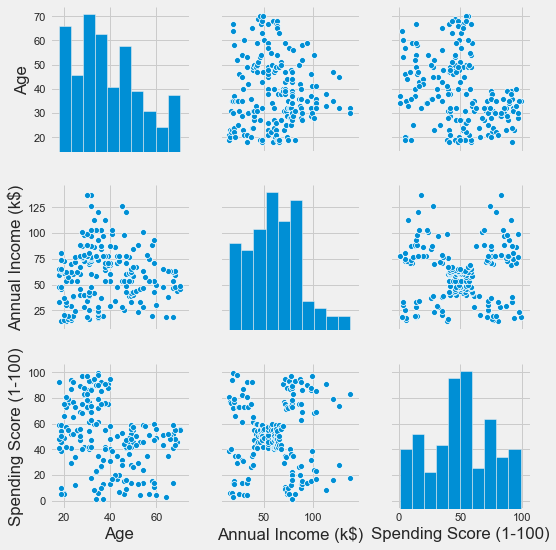

In [83]:
sns.pairplot(dataset[['Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]);

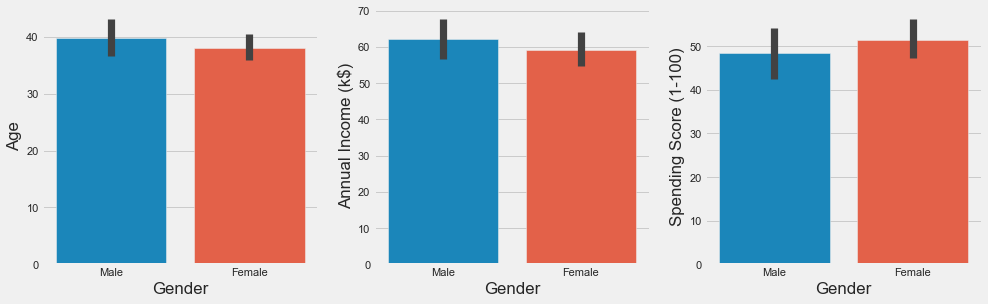

In [84]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3,3,1)
sns.barplot(y='Age',x='Gender', data=dataset);
ax2 = fig.add_subplot(3,3,2)
sns.barplot(y='Annual Income (k$)',x='Gender', data=dataset);
ax3 = fig.add_subplot(3,3,3)
sns.barplot(y='Spending Score (1-100)',x='Gender', data=dataset);

#### Visualization with PCA

In [89]:
data_mod= dataset.drop(['CustomerID'], axis=1)
data_mod['Gender'] = dataset['Gender'].factorize()[0]
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


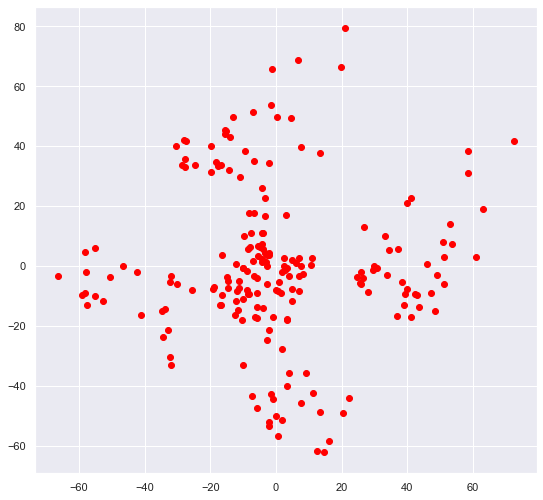

In [90]:
pca = PCA(n_components=2)
pca.fit(data_mod)
Xpca = pca.transform(data_mod)
sns.set()
plt.figure(figsize=(8,8))
plt.scatter(Xpca[:,0],Xpca[:,1], c='red')
plt.show()

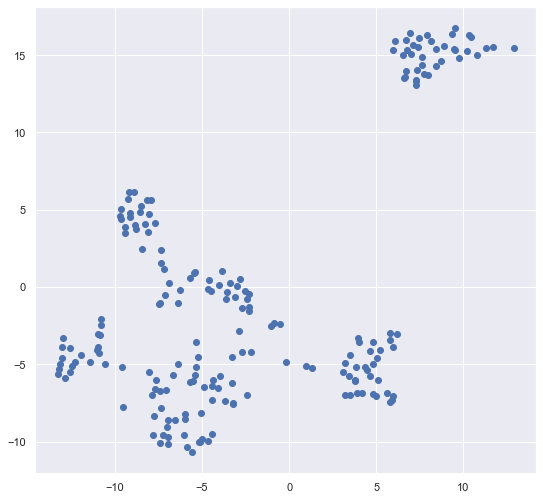

In [91]:
from sklearn.manifold import TSNE
tsn = TSNE()
res_tsne = tsn.fit_transform(data_mod)
plt.figure(figsize=(8,8))
plt.scatter(res_tsne[:,0],res_tsne[:,1]);

This method gives us structure with one strongly remote cluster. But now we can't clearly talk how many clusters need model? After PCA - 5 clusters and after tsne? 5 or 6? 

In [92]:
from sklearn.cluster import AgglomerativeClustering as AggClus

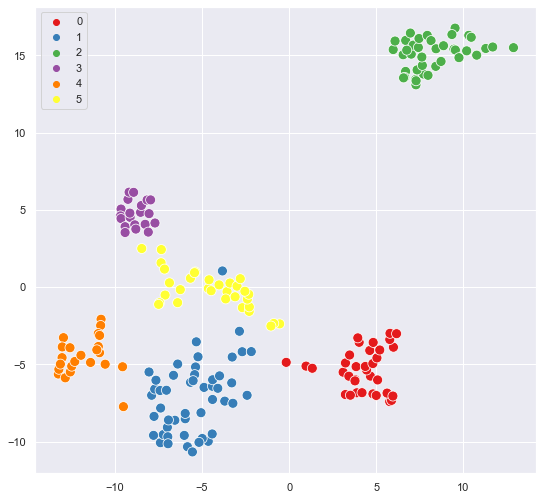

In [93]:
clus_mod = AggClus(n_clusters=6)
assign = clus_mod.fit_predict(data_mod)
plt.figure(figsize=(8,8))
sns.set(style='darkgrid',palette='muted')
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x=res_tsne[:,0],y=res_tsne[:,1],s=100, hue=assign, palette='Set1');

#### Is it optimal clusters number? Consider dendrogramm:

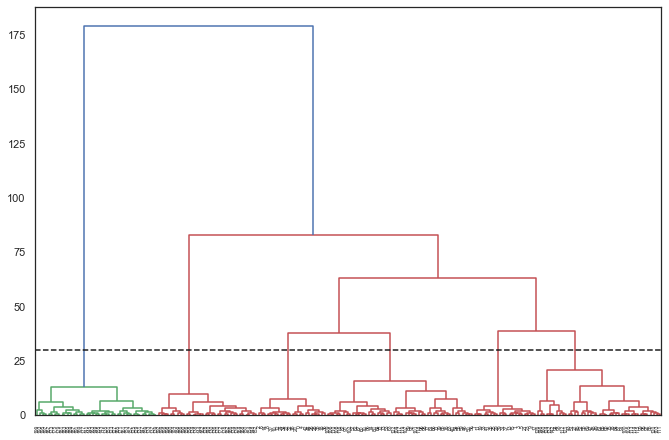

In [94]:
from scipy.cluster.hierarchy import dendrogram, ward
sns.set(style='white')
plt.figure(figsize=(10,7))
link = ward(res_tsne)
dendrogram(link)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [30,30],'--', c='k')
ax.plot(bounds,'--', c='k')
plt.show()

It seems that optimal are 6 clusters. 

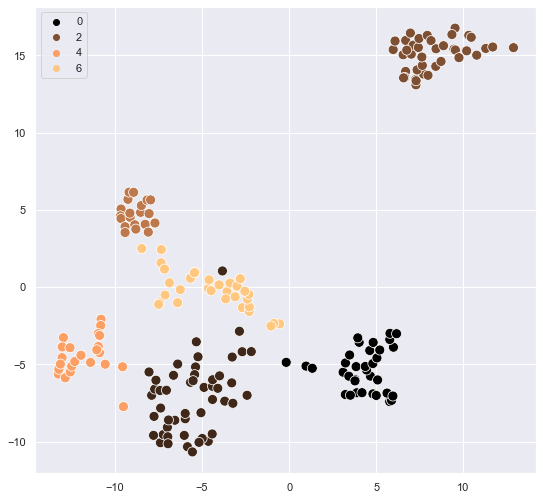

In [95]:
clus_mod = AggClus(n_clusters=6)
assign = clus_mod.fit_predict(data_mod)
plt.figure(figsize=(8,8))
sns.set(style='darkgrid',palette='muted')
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x=res_tsne[:,0],y=res_tsne[:,1],s=100, hue=assign, palette='copper');

In [96]:
data_mod['predict'] = pd.DataFrame(assign)

In [97]:
data_mod.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),predict
0,0,19,15,39,4
1,0,21,15,81,3
2,1,20,16,6,4
3,1,23,16,77,3
4,1,31,17,40,4


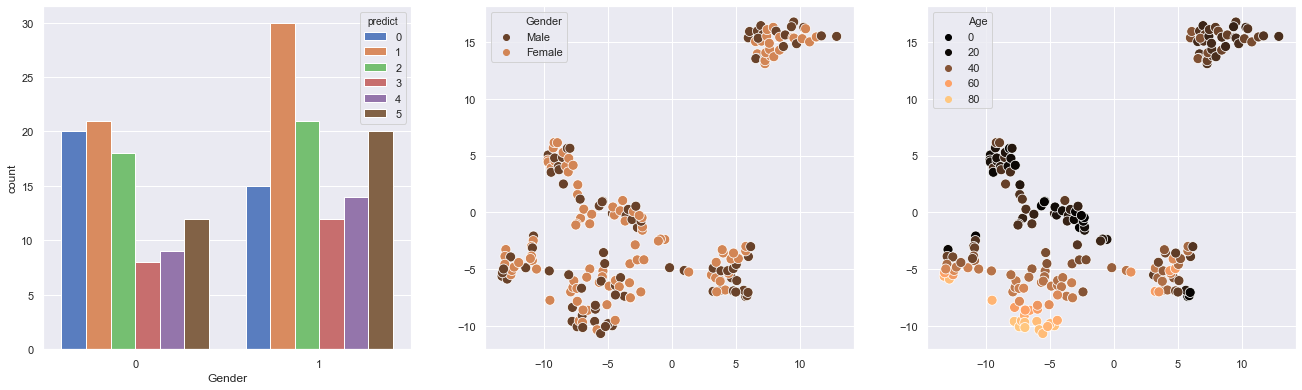

In [102]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(3,3,1)
sns.countplot(data_mod['Gender'],hue=data_mod['predict']);
ax2 = fig.add_subplot(3,3,2)
sns.scatterplot(x=res_tsne[:,0],y=res_tsne[:,1],s=100, hue=dataset['Gender'], palette='copper');
ax3 = fig.add_subplot(3,3,3)
sns.scatterplot(x=res_tsne[:,0],y=res_tsne[:,1],s=100, hue=dataset['Age'], palette='copper');

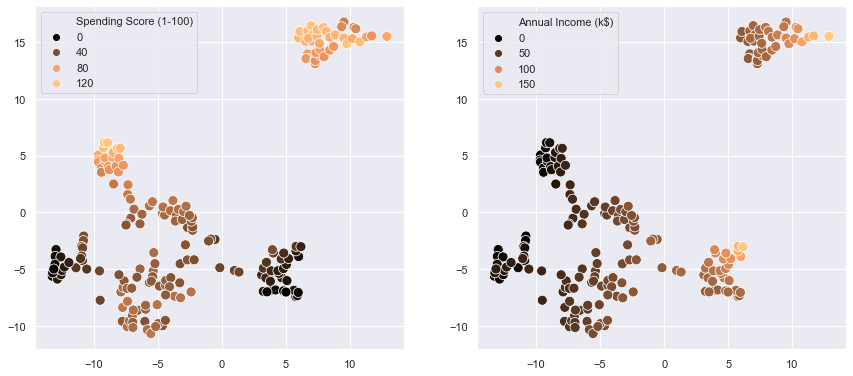

In [99]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(3,3,1)
sns.scatterplot(x=res_tsne[:,0],y=res_tsne[:,1],s=100, hue=dataset['Spending Score (1-100)'], palette='copper');
ax2 = fig.add_subplot(3,3,2)
sns.scatterplot(x=res_tsne[:,0],y=res_tsne[:,1],s=100, hue=dataset['Annual Income (k$)'], palette='copper');

Text(0.5, 0, 'Silhouette coefficient')

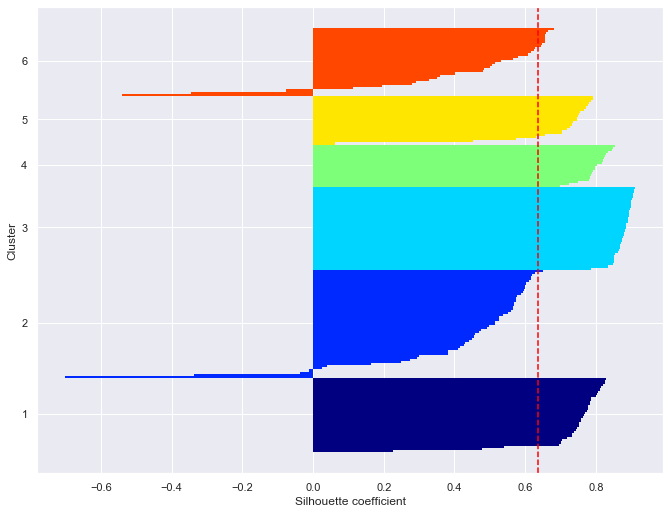

In [100]:
from matplotlib import cm
cluster_labels=np.unique(assign)
n_clusters = len(np.unique(assign))
silhouette_vals = silhouette_samples(res_tsne, assign, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
plt.figure(figsize=(10,8))
for i , c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[assign==c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower,y_ax_upper),
                c_silhouette_vals,height=1.0,edgecolor='none',color=color)
        yticks.append((y_ax_lower+y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)

plt.axvline(silhouette_avg,color="red",linestyle= "--")
plt.yticks(yticks , cluster_labels + 1)
plt.ylabel ('Cluster')
plt.xlabel('Silhouette coefficient')


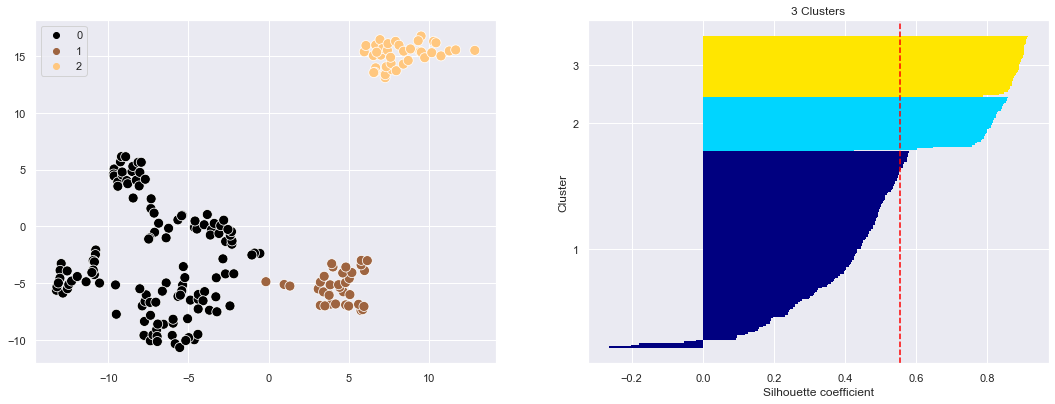

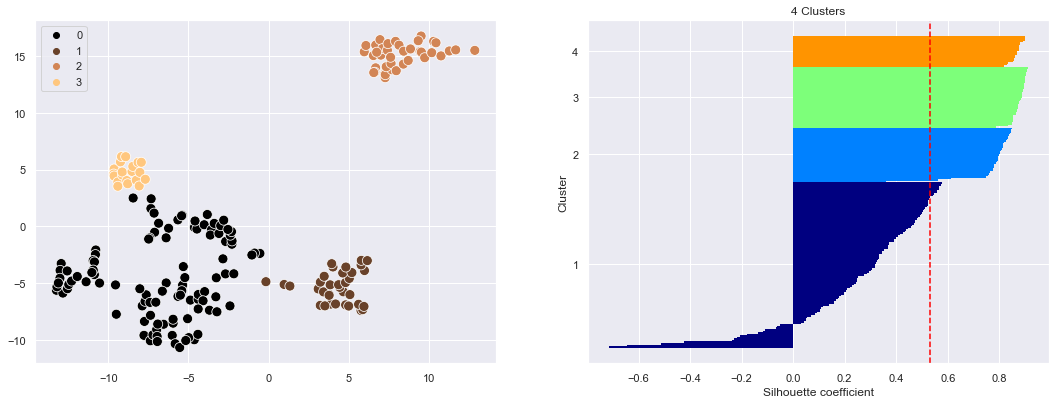

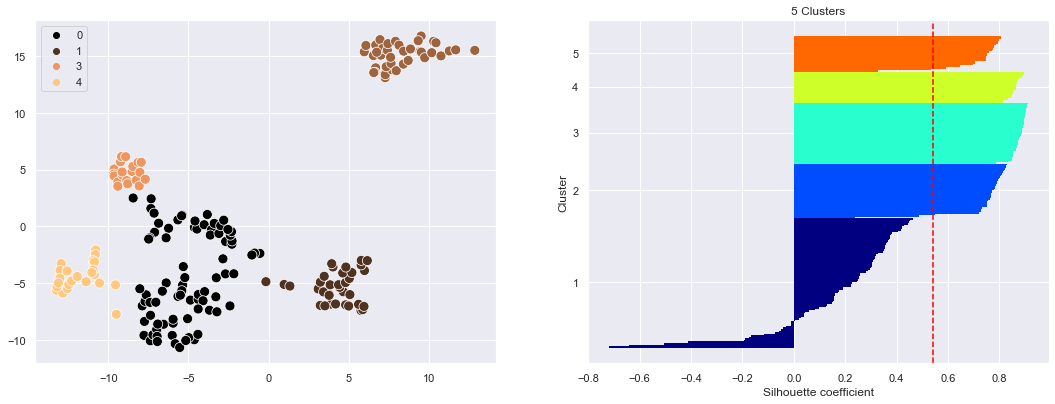

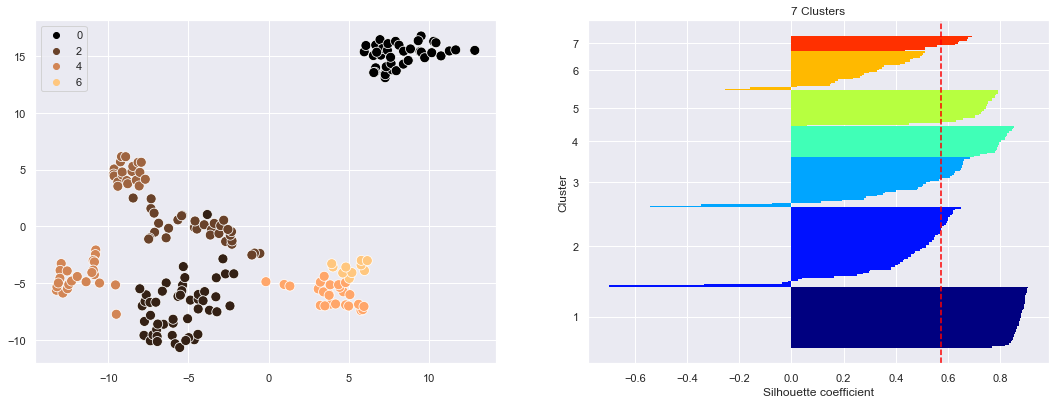

In [105]:
def clust_sill(num):
    fig = plt.figure(figsize=(25,20))
    ax1 = fig.add_subplot(3,3,1)

    clus_mod = AggClus(n_clusters=num)
    assign = clus_mod.fit_predict(data_mod)
    sns.set(style='darkgrid',palette='muted')
    cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
    sns.scatterplot(x=res_tsne[:,0],y=res_tsne[:,1],s=100, hue=assign, palette='copper');
    cluster_labels=np.unique(assign)
    n_clusters = len(np.unique(assign))
    silhouette_vals = silhouette_samples(res_tsne, assign, metric='euclidean')

    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    ax2 = fig.add_subplot(3,3,2)
    for i , c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[assign==c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower,y_ax_upper),
                c_silhouette_vals,height=1.0,edgecolor='none',color=color)
        yticks.append((y_ax_lower+y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    
    plt.title(str(num)+ ' Clusters')
    plt.axvline(silhouette_avg,color="red",linestyle= "--")
    plt.yticks(yticks , cluster_labels + 1)
    plt.ylabel ('Cluster')
    plt.xlabel('Silhouette coefficient')
clust_sill(3)
clust_sill(4)
clust_sill(5)
clust_sill(7)


The choice of 6 clusters seems optimal in this dataset.

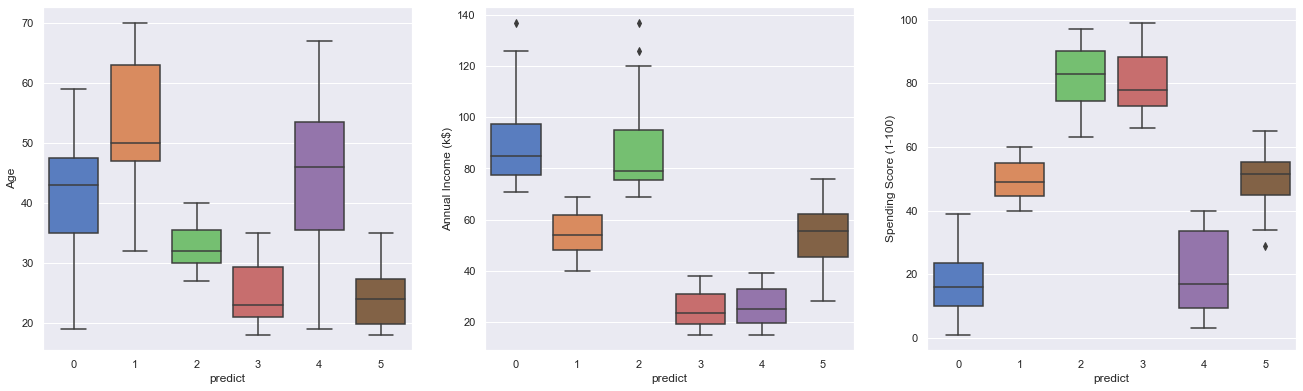

In [111]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(3,3,1)
sns.boxplot(y='Age',x='predict',data=data_mod);
ax2 = fig.add_subplot(3,3,2)
sns.boxplot(y='Annual Income (k$)',x='predict',data=data_mod);
ax3 = fig.add_subplot(3,3,3)
sns.boxplot(y='Spending Score (1-100)',x='predict',data=data_mod);